In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
df1 = pd.read_csv("/home/utilisateur/Documents/dev/devia/projet_final_api_ia/database/data/cleaned_data.csv")

In [27]:
colonnes = list(df1.columns)
print(colonnes)

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'model']


In [28]:
df1

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,model
0,3,alfa-romeo,gas,std,2,convertible,rwd,front,225.04,428.75,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,3,alfa-romeo,gas,std,2,convertible,rwd,front,225.04,428.75,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,1,alfa-romeo,gas,std,2,hatchback,rwd,front,240.03,434.85,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio
3,2,audi,gas,std,4,sedan,fwd,front,253.49,448.56,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls
4,2,audi,gas,std,4,sedan,4wd,front,252.48,448.56,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,4,sedan,rwd,front,277.11,479.55,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,145e (sw)
201,-1,volvo,gas,turbo,4,sedan,rwd,front,277.11,479.55,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,144ea
202,-1,volvo,gas,std,4,sedan,rwd,front,277.11,479.55,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,244dl
203,-1,volvo,diesel,turbo,4,sedan,rwd,front,277.11,479.55,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,246


In [39]:
# Séparation des variables dépendantes et indépendantes
y = df1['price']
X = df1[['CarName', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]

numeric_features =  ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'cylindernumber']
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])

categorial_features = ['CarName','carbody', 'drivewheel', 'enginetype', 'fuelsystem']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=None, min_samples_split=5, min_samples_leaf=2)

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# Calcul des métriques pour l'ensemble d'entraînement
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calcul des métriques pour l'ensemble de test
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"        Eentraînement :\n MSE = {mse_train}, \n MAE = {mae_train},\n R² = {r2_train}")
print(f"        Test : \n MSE = {mse_test}, \n MAE = {mae_test},\n R² = {r2_test}")




        Eentraînement :
 MSE = 1619361.161896104, 
 MAE = 822.2122780215211,
 R² = 0.9728467490963026
        Test : 
 MSE = 3780267.1741002575, 
 MAE = 1354.5982598514292,
 R² = 0.9521145853482318


In [ ]:
with open('model_predict_car.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [31]:
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=0,
                           random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [32]:
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


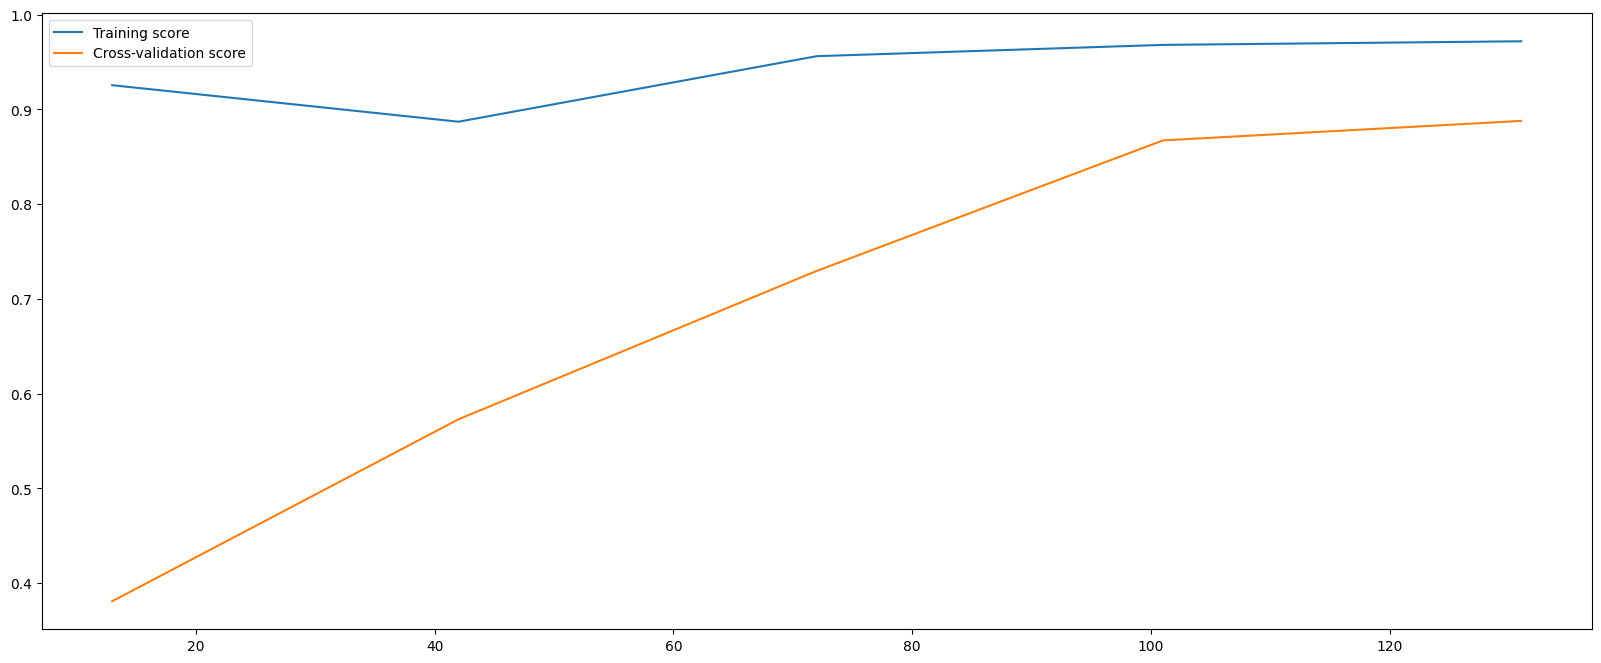

In [33]:
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()
